# Let's predict total handle time

In [210]:
from fbprophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('handle_time.csv', usecols=range(4))

In [211]:
df['StartInterval'] = pd.to_datetime(df['StartInterval'])

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2206 entries, 0 to 2205
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   StartInterval    2206 non-null   datetime64[ns]
 1   Talk Time        1933 non-null   float64       
 2   Hold time        1933 non-null   float64       
 3   After call work  1933 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 69.1 KB


In [213]:
print('period start:',df['StartInterval'].min())
print('period end:', df['StartInterval'].max())
print('total period:', df['StartInterval'].max() - df['StartInterval'].min())

period start: 2020-06-18 00:00:00
period end: 2020-09-26 13:30:00
total period: 100 days 13:30:00


In [214]:
df.index = df['StartInterval']

In [215]:
df = df.resample('H').sum()

## drop or fill nulls

In [216]:
df = df.dropna()

In [217]:
df.describe()

,Talk Time,Hold time,After call work
count,2414.000000,2414.000000,2.414000e+03
mean,184585.916321,28250.051367,7.942396e+04
std,277086.697441,42678.470993,1.337605e+05
min,0.000000,0.000000,0.000000e+00
25%,0.000000,0.000000,0.000000e+00
50%,0.000000,0.000000,0.000000e+00
75%,389148.250000,60027.000000,1.552165e+05
max,951995.000000,151503.000000,1.829388e+06


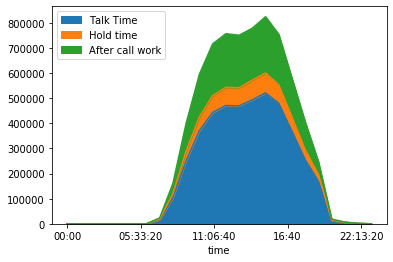

In [218]:
g = df.groupby(df.index.time).mean()

g.plot.area(stacked=True)

# Create daily Data

In [219]:
#  drop weekends
df = df[~df.index.weekday.isin([5,6])]

g = df.groupby(df.index.date).sum()

g

,Talk Time,Hold time,After call work
2020-06-18,5324634.0,783520.0,2260201.0
2020-06-19,5371758.0,808273.0,2335702.0
2020-06-22,7030229.0,1052391.0,2922606.0
2020-06-23,6391977.0,956272.0,2581958.0
2020-06-24,5800921.0,872907.0,2461434.0
...,...,...,...
2020-09-21,7015895.0,1133740.0,2807607.0
2020-09-22,5969953.0,979759.0,2504831.0
2020-09-23,5666736.0,913597.0,2422270.0
2020-09-24,5304691.0,800143.0,2236403.0


In [220]:
df = pd.DataFrame([g.index, g['Talk Time']]).T

In [221]:
#  pre-format for prophet
df.columns = ['ds','y']

df.head()

,ds,y
0,2020-06-18,5.32463e+06
1,2020-06-19,5.37176e+06
2,2020-06-22,7.03023e+06
3,2020-06-23,6.39198e+06
4,2020-06-24,5.80092e+06


In [222]:
# create default prophet model
m = Prophet(daily_seasonality=True)
m.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [223]:
future = m.make_future_dataframe(periods=100)
future.tail()

,ds
167,2020-12-30
168,2020-12-31
169,2021-01-01
170,2021-01-02
171,2021-01-03


In [224]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
167,2020-12-30,5.873761e+06,4.346321e+06,7.298247e+06
168,2020-12-31,5.453444e+06,4.083903e+06,6.981075e+06
169,2021-01-01,5.167234e+06,3.649740e+06,6.617915e+06
170,2021-01-02,4.904018e+06,3.454214e+06,6.429752e+06
171,2021-01-03,4.901932e+06,3.378474e+06,6.306045e+06


In [227]:
future

,ds
0,2020-06-18
1,2020-06-19
2,2020-06-22
3,2020-06-23
4,2020-06-24
...,...
167,2020-12-30
168,2020-12-31
169,2021-01-01
170,2021-01-02
